# Web scraping

* 웹을 통해 자동으로 데이터를 수집하는 프로그램
    * 간편하게 데이터 수집 가능
    * 마크업 언어로 작성된 문서에서 필요한 정보만을 수집
    * Waeb crawling과 혼용되어 사용되지만 다소 차이가 존재
        * Crawling: 검색 결과로 유사한 정보의 데이터(=웹 페이지)를 모으는 것
        * Scraping: 웹 페이지에서 특정 데이터를 모으는 것

# Getting started

* 설치할 라이브러리
    * selenium
    * chromedriver-autoinstaller
    * Beatiful Soup
    * tqdm
    * urlopen
    * requests
    * pprint
        * 내장 라이브러리
        * 가독성있는 데이터 출력

## Installation

### selenium

* 동적 페이지 읽어오기

In [1]:
!pip install selenium

### chromedriver-autoinstaller

* 버전에 맞는 드라이버 자동 설치

In [2]:
!pip install chromedriver-autoinstaller

### Beatiful Soup

* html 파싱

In [3]:
!pip install BeautifulSoup4

### tqdm

* 진행 상황 표시

In [4]:
!pip install tqdm

### urlopen

* url 주소로 페이지 읽어오기
    * 정적 페이지 한정

In [5]:
!pip install urlopen

### requests

* api 호출을 위해 사용

In [6]:
!pip install requests

### Etc.

* numpy
* pandas
* maplotlib
* seaborn

## Modules import

In [91]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import chromedriver_autoinstaller
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import requests
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [109]:
font_path = "C:/indows/Fonts/consola.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\indows\\Fonts\\consola.ttf'

In [110]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [111]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

['C:\\Windows\\Fonts\\simsunb.ttf', 'C:\\Windows\\Fonts\\Candaraz.ttf', 'C:\\Windows\\Fonts\\Candaral.ttf', 'C:\\Windows\\Fonts\\l_10646.ttf', 'C:\\Windows\\Fonts\\CascadiaMono.ttf', 'C:\\Windows\\Fonts\\verdanab.ttf', 'C:\\Windows\\Fonts\\msyhbd.ttc', 'C:\\Windows\\Fonts\\msjhl.ttc', 'C:\\Windows\\Fonts\\georgiai.ttf', 'C:\\Windows\\Fonts\\courbi.ttf', 'C:\\Windows\\Fonts\\palai.ttf', 'C:\\Windows\\Fonts\\corbelz.ttf', 'C:\\Windows\\Fonts\\courbd.ttf', 'C:\\Windows\\Fonts\\corbelli.ttf', 'C:\\Windows\\Fonts\\Candarab.ttf', 'C:\\Windows\\Fonts\\verdana.ttf', 'C:\\Windows\\Fonts\\Gabriola.ttf', 'C:\\Windows\\Fonts\\SegoeIcons.ttf', 'C:\\Windows\\Fonts\\SegUIVar.ttf', 'C:\\Windows\\Fonts\\ariblk.ttf', 'C:\\Windows\\Fonts\\georgiab.ttf', 'C:\\Windows\\Fonts\\timesbd.ttf', 'C:\\Windows\\Fonts\\segoeuiz.ttf', 'C:\\Windows\\Fonts\\impact.ttf', 'C:\\Windows\\Fonts\\marlett.ttf', 'C:\\Windows\\Fonts\\cambriab.ttf', 'C:\\Windows\\Fonts\\msyi.ttf', 'C:\\Windows\\Fonts\\seguisbi.ttf', 'C:\\Window

## Driver import

* 생성된 크롬창 끄면 안 됨
* 웹 브라우저에 맞게 사용
    * 본 수업에서는 크롬 사용
* 스크래핑을 수행할 때마다 실행
    * 크롬이 업데이트될 때마다 버전에 맞는 드라이버 자동 설치

```
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
s = Service(f'./{chrome_ver}/chromedriver.exe')

try:
    driver = webdriver.Chrome(service=s)   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(service=s)

driver.implicitly_wait(10)
```

# HEARTHSTONE

## Deck info scraping

* 스크래핑할 사이트: HSReplay.net
> https://hsreplay.net/

In [112]:
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
s = Service(f'./{chrome_ver}/chromedriver.exe')

try:
    driver = webdriver.Chrome(service=s)   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(service=s)

driver.implicitly_wait(10)

In [113]:
decks = []
startPage = 1
endPage = 1
for page in tqdm(range(startPage,startPage+endPage),desc="Get Deck List"):
    url = "https://hsreplay.net/decks/#playerClasses=DEATHKNIGHT"
    driver.get(url)
    time.sleep(2)
    bsObject = BeautifulSoup(driver.page_source, "html.parser")
    deckTags = bsObject.select("section.deck-list > ul > li > a")
    for deckTag in deckTags:
        deck = {}
        deckRow = deckTag.findChild("div",{"class":"row"})
        deck["클래스"] = deckTag["data-card-class"]
        deck["이름"] = deckRow.findChild("h3",{"class":"deck-name"}).get_text();
        deck["가루량"] = int(deckRow.findChild("span",{"class":"dust-cost"}).get_text().strip())
        deck["승률"] = float(deckRow.findChild("span",{"class":"win-rate"}).get_text().replace("%","").strip());
        deck["판수"] = int(deckRow.findChild("span",{"class":"game-count"}).get_text().replace(",","").strip());
        decks.append(deck);
decks = pd.DataFrame(decks)
decks.head()

Get Deck List: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.93s/it]


,클래스,이름,가루량,승률,판수
0,DEATHKNIGHT,Unholy Death Knight,4680,61.1,43000
1,DEATHKNIGHT,Frost Death Knight,5480,54.9,17000
2,DEATHKNIGHT,Unholy Death Knight,6300,61.5,14000
3,DEATHKNIGHT,Frost Death Knight,5680,59.1,8200
4,DEATHKNIGHT,Blood Death Knight,9480,54.9,6800


In [114]:
decks = []
startPage = 1
endPage = 1
for page in tqdm(range(startPage,startPage+endPage),desc="Get Deck List"):
    url = "https://hsreplay.net/decks/#playerClasses=DEATHKNIGHT"
    driver.get(url)
    time.sleep(2)
    bsObject = BeautifulSoup(driver.page_source, "html.parser")
    deckTags = bsObject.select("section.deck-list > ul > li > a")
    for deckTag in deckTags:
        deck = {}
        deckRow = deckTag.findChild("div",{"class":"row"})
        deck["클래스"] = deckTag["data-card-class"]
        deck["이름"] = deckRow.findChild("h3",{"class":"deck-name"}).get_text();
        deck["가루량"] = int(deckRow.findChild("span",{"class":"dust-cost"}).get_text().strip())
        deck["승률"] = float(deckRow.findChild("span",{"class":"win-rate"}).get_text().replace("%","").strip());
        deck["판수"] = int(deckRow.findChild("span",{"class":"game-count"}).get_text().replace(",","").strip());
        deck["게임시간"] = float(deckRow.findChild("span",{"class":"duration"}).get_text().replace("분","").strip());
        decks.append(deck);
decks = pd.DataFrame(decks)
decks.head()

Get Deck List: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.75s/it]


,클래스,이름,가루량,승률,판수,게임시간
0,DEATHKNIGHT,Unholy Death Knight,4680,61.1,43000,7.7
1,DEATHKNIGHT,Frost Death Knight,5480,54.9,17000,7.9
2,DEATHKNIGHT,Unholy Death Knight,6300,61.5,14000,7.5
3,DEATHKNIGHT,Frost Death Knight,5680,59.1,8200,7.8
4,DEATHKNIGHT,Blood Death Knight,9480,54.9,6800,10.7


## Data analysis

### Box plot

* 승률 분포 확인

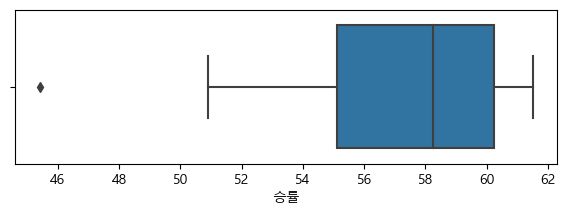

In [115]:
plt.figure(figsize=(7, 2))
sns.boxplot(data=decks['승률'], x=decks['승률'], orient='h')
plt.show()

### Correlation

* 승률과 판수의 상관관계 확인

C:\Users\k0105\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


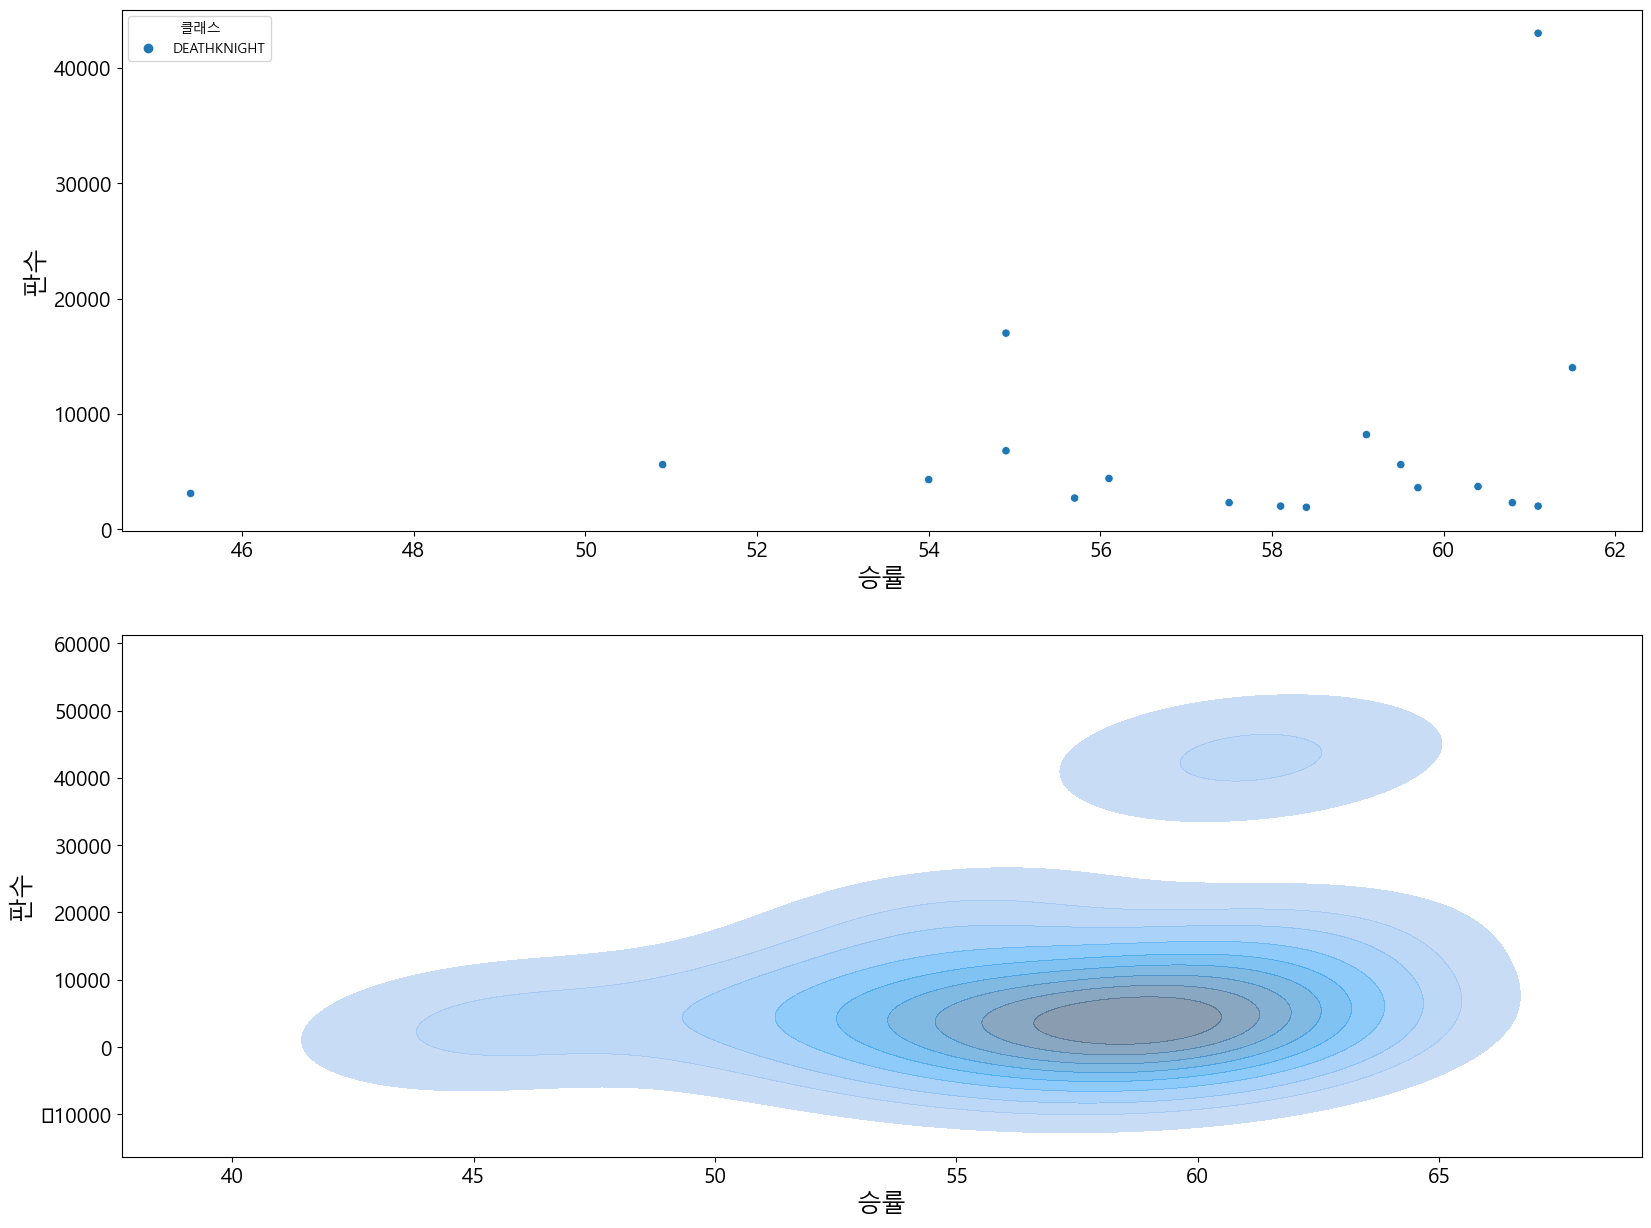

In [118]:
figures, axes = plt.subplots(2)
plt.subplots_adjust(right=2.5, top=2.5, hspace=0.2)
p1 = sns.scatterplot(data=decks, ax=axes[0], x='승률', y='판수', hue='클래스')
p1.set_xlabel('승률', fontsize=18)
p1.set_ylabel('판수', fontsize=18)
p1.tick_params(labelsize=15)
p2 = sns.kdeplot(data=decks, ax=axes[1], x='승률', y='판수', alpha=0.6, fill=True)
p2.set_xlabel('승률', fontsize=18)
p2.set_ylabel('판수', fontsize=18)
p2.tick_params(labelsize=15)

plt.show()

C:\Users\k0105\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


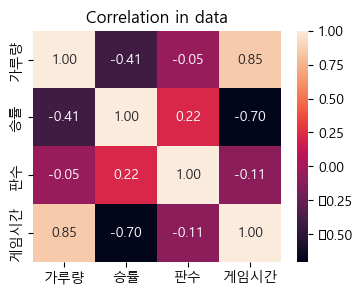

In [119]:
plt.figure(figsize=(4, 3))
plt.title('Correlation in data')
sns.heatmap(decks.corr(), annot=True, fmt=".2f")
plt.show()

### Maximum

#### Deck

##### The most expensive deck

In [120]:
decks[decks["가루량"]==decks["가루량"].max()]

,클래스,이름,가루량,승률,판수,게임시간
8,DEATHKNIGHT,Blood Death Knight,14720,54.0,4300,11.0


##### Deck with the most wins

In [121]:
decks[decks["승률"]==decks["승률"].max()]

,클래스,이름,가루량,승률,판수,게임시간
2,DEATHKNIGHT,Unholy Death Knight,6300,61.5,14000,7.5


##### The most played deck

In [122]:
decks[decks["판수"]==decks["판수"].max()]

,클래스,이름,가루량,승률,판수,게임시간
0,DEATHKNIGHT,Unholy Death Knight,4680,61.1,43000,7.7


##### The class with the most decks

In [123]:
decks["클래스"].mode()

0    DEATHKNIGHT
Name: 클래스, dtype: object

#### Class

* 데이터 프레임 생성
    * 악마사냥꾼 : DEMONHUNTER
    * 드루이드 : DRUID
    * 사냥꾼 : HUNTER
    * 마법사 : MAGE
    * 성기사 : PALADIN
    * 사제 : PRIEST
    * 도적 : ROGUE
    * 주술사 : SHAMAN
    * 흑마법사 : WARLOCK
    * 전사 : WARRIOR

In [21]:
classList = ["DEMONHUNTER","DRUID","HUNTER","MAGE","PALADIN","PRIEST","ROGUE","SHAMAN","WARLOCK","WARRIOR"]
classDataframe = []
for className in classList:
    classData = {"클래스":className}
    classDecks = decks[decks["클래스"]==className]
    classData["총 판수"] = classDecks["판수"].sum()
    classData["승률"] = classDecks["승률"].mean()
    classDataframe.append(classData)
classDataframe = pd.DataFrame(classDataframe)
classDataframe

,클래스,총 판수,승률
0,DEMONHUNTER,31440,51.525000
1,DRUID,49190,54.016667
2,HUNTER,55920,59.540000
3,MAGE,147830,53.504651
4,PALADIN,76230,56.659259
5,PRIEST,35840,51.125000
6,ROGUE,50190,49.111765
7,SHAMAN,90250,55.400000
8,WARLOCK,86060,55.025000
9,WARRIOR,13640,52.333333


##### Class with the most wins

In [20]:
classDataframe[classDataframe["승률"]==classDataframe["승률"].max()]

NameError: name 'classDataframe' is not defined

##### The most played class

In [ ]:
classDataframe[classDataframe["총 판수"]==classDataframe["총 판수"].max()]

* 분석 종료 후, 드라이버 종료

In [ ]:
driver.quit()

____
* 12월 10일 진행

# LoL

## Summoner info scraping

### Get API Key using Riot API

## https://developer.riotgames.com/

1. 롤 계정 로그인
    * 없을 시, sign up
    * 휴면계정일 경우, 해제 후 게임에 진입하여 닉네임 재설정
    * 재로그인
2. DASHBOARD 진입
    * 로그인 시, 자동 진입
3. DEVELOPMENT API KEY 복사

유효기간은 24시간, 1초에 20개 2분에 100개 제한

In [131]:
api_key = 'RGAPI-279a4616-e333-4dca-a369-a062542a5a9c'

### Get summoner info

* summoner_name에 닉네임 할당

In [132]:
summoner_name = "Pyeon Su hui"
url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + summoner_name +'?api_key=' + api_key
summoner_info = requests.get(url).json()
summoner_info

{'id': 'iRbqi3y8cAEmWkNqFqAqYrI_cLCh5pt3rosvdqTMw1f2VR77',
 'accountId': 'REFo7EFym5fBK_j_K6m6hUsVm2FbQvbnslpYyr94NzhYwFK3HHgFGkhb',
 'puuid': 'jDs7rYKkBt14gCDo_9QJqla58jmH607PhrDtTzkoIoMZ6KXXtY_ZszyOzmembEyYVO09s3iXvxz4Lw',
 'name': 'Pyeon Su hui',
 'profileIconId': 4833,
 'revisionDate': 1676036639825,
 'summonerLevel': 293}

#### Get the ID of the recent match

In [133]:
puuid = summoner_info['puuid']
count = "100"
url = "https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/"+ puuid + "/ids?api_key=" + api_key +"&count=" + count
match_ids = requests.get(url).json()

In [134]:
matches = []
for match_id in tqdm(match_ids):
    match = {}
    url = "https://asia.api.riotgames.com/lol/match/v5/matches/"+match_id+"?api_key="+api_key
    result = requests.get(url).json()
    if 'status' in result : continue
    match['매치아이디'] = match_id
    match['게임모드'] = result['info']['gameMode']
    match['매치시간'] = result['info']['gameStartTimestamp']
    my_participants = list(filter(lambda x: x['summonerName']==summoner_name, result['info']['participants']))[0]
    match['챔피언'] = my_participants['championName']
    match['킬'] = my_participants['kills']
    match['데스'] = my_participants['deaths']
    match['어시스트'] = my_participants['assists']
    match['결과'] = '승리' if my_participants['win'] else '패배'
    matches.append(match)
matches = pd.DataFrame(matches)
matches.head()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.76it/s]


,매치아이디,게임모드,매치시간,챔피언,킬,데스,어시스트,결과
0,KR_6355396252,CLASSIC,1676035059069,Blitzcrank,2,12,12,패배
1,KR_6355314541,CLASSIC,1676033218761,Blitzcrank,7,4,15,승리
2,KR_6355241881,CLASSIC,1676031645896,Blitzcrank,5,3,18,승리
3,KR_6353931467,CLASSIC,1675954311699,Blitzcrank,4,3,19,승리
4,KR_6353865224,CLASSIC,1675952538087,Lissandra,7,5,11,승리


### Data analysis

#### Keyboard input frequency

##### Installation

In [129]:
!pip install pynput

     ---------------------------------------- 89.2/89.2 kB 4.9 MB/s eta 0:00:00


##### How to use

* 아래 셀을 가급적 실행하지 말 것
    * 주피터 노트북 상에도 동작은 하지만 웹에서 동작하는 것만큼 입력에 제한을 받음
* 파이썬이 설치되었다는 가정하에, 파이썬 파일 작성
* 실제 수업에선 직접 타이핑하고 확인하는 시간을 가져보면 시간 면에서 좋을듯함
    * 실제 인게임에서도 작동이 되는지 등
* 쓸데없는 입력을 방지하고자 게임 직전에 실행, 더블 모니터 이상이면 상관없음
* F4 입력하면 종료
    * 종료됨과 동시에 플로팅 및 파일 저장
    * 데이터는 덮어쓰기 형식으로 데이터가 누적되도록 함
* 채팅에 사용하는 타이핑은 안 받도록 플래그 처리해둠

##### Code

In [ ]:
from pynput.keyboard import Key, Listener
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


class main:
    def __init__(self):
        self.key_frequency = {'q': 0, 'w': 0, 'e': 0, 'r': 0, 'd': 0, 'f': 0, '1': 0, '2': 0, '3': 0, '5': 0, '6': 0,
                              '7': 0, '4': 0}
        self.flag = 1

    def on_release(self, key):
        data = str(key)[1:-1].lower()

        if key == Key.enter:
            self.flag *= -1

        if self.flag == 1 and data in self.key_frequency.keys():
            self.key_frequency[data] += 1

        print('{0} release'.format(key))
        if key == Key.f4:
            return False

    def convert_df(self):
        return pd.DataFrame(self.key_frequency, index=[0])

    def save_df(self):
        if not os.path.exists('key_freq.csv'):
            self.convert_df().to_csv('key_freq.csv', mode='w', index=False)
        else:
            self.convert_df().to_csv('key_freq.csv', mode='a', index=False, header=False)

    def visualize(self):
        key_df = self.convert_df()

        x = np.arange(len(key_df.columns))
        plt.figure(figsize=(6, 6))
        plt.title('Keyboard Frequency')
        plt.grid(axis='y')
        plt.xticks(x, key_df.columns)
        plt.bar(x, key_df.iloc[-1])
        plt.show()

    def run(self):
        print('Recording start..\n')
        with Listener(on_release=self.on_release) as listener:
            listener.join()
        self.save_df()
        self.visualize()


if __name__ == '__main__':
    main().run()

Recording start..

Key.enter release
Key.ctrl_l release
Key.enter release
Key.enter release
Key.ctrl_l release
Key.tab release
Key.ctrl_l release
Key.up release
Key.down release
Key.up release
Key.down release
Key.enter release
Key.ctrl_l release
Key.down release
Key.enter release
Key.ctrl_l release


In [ ]:
key_df = pd.read_csv('./빈도 체크/key_freq.csv')
key_df

In [ ]:
plt.title('Keyboard Frequency')
sns.barplot(x=key_df.columns, y=key_df.values[0])
plt.show()

#### 칼바람

In [137]:
aram_matches = matches[matches['게임모드'] == 'ARAM']
aram_matches.head()

,매치아이디,게임모드,매치시간,챔피언,킬,데스,어시스트,결과


##### KDA

In [138]:
aram_ka_per_d = (aram_matches['킬'].sum() + aram_matches['어시스트'].sum())/aram_matches['데스'].sum()
print('KDA :',round(aram_ka_per_d,4))

KDA : nan


C:\Users\k0105\AppData\Local\Temp\ipykernel_5380\1719735897.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  aram_ka_per_d = (aram_matches['킬'].sum() + aram_matches['어시스트'].sum())/aram_matches['데스'].sum()


##### The most played champ

In [139]:
aram_most_champion = aram_matches['챔피언'].mode()[0]
print('가장 많이 플레이한 챔피언 :',aram_most_champion)

KeyError: 0

##### Winning rate

In [ ]:
aram_win_rate = len(aram_matches[aram_matches['결과'] == '승리']) / len(aram_matches)
print('승률 :', round(aram_win_rate*100,4),"%")

#### 일반게임

In [175]:
classic_matches = matches[matches['게임모드'] == 'CLASSIC']
classic_matches.head()

,매치아이디,게임모드,매치시간,챔피언,킬,데스,어시스트,결과
0,KR_6355396252,CLASSIC,1676035059069,Blitzcrank,2,12,12,패배
1,KR_6355314541,CLASSIC,1676033218761,Blitzcrank,7,4,15,승리
2,KR_6355241881,CLASSIC,1676031645896,Blitzcrank,5,3,18,승리
3,KR_6353931467,CLASSIC,1675954311699,Blitzcrank,4,3,19,승리
4,KR_6353865224,CLASSIC,1675952538087,Lissandra,7,5,11,승리


##### KDA

In [176]:
classic_ka_per_d = (classic_matches['킬'].sum() + classic_matches['어시스트'].sum())/classic_matches['데스'].sum()
print('KDA :',round(classic_ka_per_d,4))

KDA : 2.452


##### The most played champ

In [177]:
classic_most_champion = classic_matches['챔피언'].mode()[0]
print('가장 많이 플레이한 챔피언 :',classic_most_champion)

가장 많이 플레이한 챔피언 : Jax


##### Winning rate

In [178]:
classic_win_rate = len(classic_matches[classic_matches['결과'] == '승리']) / len(classic_matches)
print('승률 :', round(classic_win_rate*100,4),"%")

승률 : 55.5556 %


##### Average

* 데이터 프레임 생성

In [179]:
res = np.array([])
classinc_avg = classic_matches
for champ in np.unique(classinc_avg['챔피언'].values):
    data = classinc_avg.loc[classinc_avg['챔피언']== champ , '킬':].values
    np.place(data, data == '승리', 1)
    np.place(data, data == '패배', 0)
    match_num = len(data)
    data = data.mean(axis=0)
    data = np.append(data, match_num)
    res = np.append(res, data)

res = pd.DataFrame(res.reshape(-1, 5))
res.index = np.unique(classinc_avg['챔피언'].values)
res.columns = ['평균 킬', '평균 데스', '평균 어시스트', '평균 승률', '매치 수']
res.head()

,평균 킬,평균 데스,평균 어시스트,평균 승률,매치 수
Ahri,2.5,5.0,6.0,0.5,2
Akali,3.0,7.0,11.0,1.0,1
Akshan,7.0,9.666667,8.666667,0.666667,3
Alistar,3.0,7.0,20.0,0.0,1
Anivia,0.0,1.0,5.0,1.0,1


* 매치 수에 따른 플레이 횟수
    * 1번만 플레이한 매치 = 24 = 24개의 챔프로 한 번씩만 플레이
    * 3번 플레이한 매치 = 3 = 3개의 챔프로 3번씩 플레이

In [196]:
res['매치 수'].value_counts()

1     18
2      5
3      3
22     2
4      1
8      1
6      1
Name: 매치 수, dtype: int64

In [197]:
res[res['매치 수'] > 2]

,평균 킬,평균 데스,평균 어시스트,평균 승률,매치 수
Akshan,7.0,9.666667,8.666667,0.666667,3
Ashe,5.5,7.25,11.25,0.25,4
Blitzcrank,3.5,5.875,14.375,0.625,8
Jax,7.454545,5.227273,5.545455,0.590909,22
Lissandra,4.272727,4.318182,8.090909,0.545455,22
Nasus,2.333333,5.0,3.333333,0.666667,3
Twitch,6.666667,5.833333,6.166667,0.5,6
Udyr,7.666667,5.0,4.0,0.666667,3


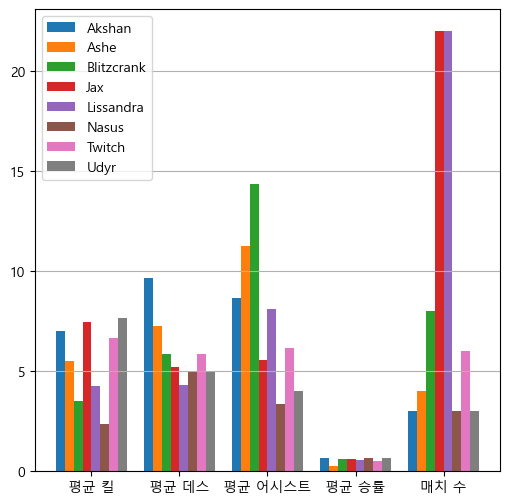

In [200]:
x = np.arange(5)
w = 0.1

# 공통 매치 수로 비교하기
Champ = res[res['매치 수'] > 2].index
Data = [res.loc[Champ[i]] for i in range(len(Champ))]

'''
챔프명 입력 받아서 비교하기
Champ = input().split()
Data = [res.loc[Champ[i]] for i in range(len(Champ))]
'''

plt.figure(figsize=(6, 6))
plt.grid(axis='y')
plt.xticks(x, ['평균 킬', '평균 데스', '평균 어시스트', '평균 승률', '매치 수'])

for i in range(len(Champ)):
    pos = x + w*(i-(len(Champ)-1)*0.5)
    plt.bar(pos, Data[i], width=w, label=Data[i].name)
plt.legend()
plt.show()

* 한 번만 플레이한 챔프들에 대해서

C:\Users\k0105\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\k0105\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


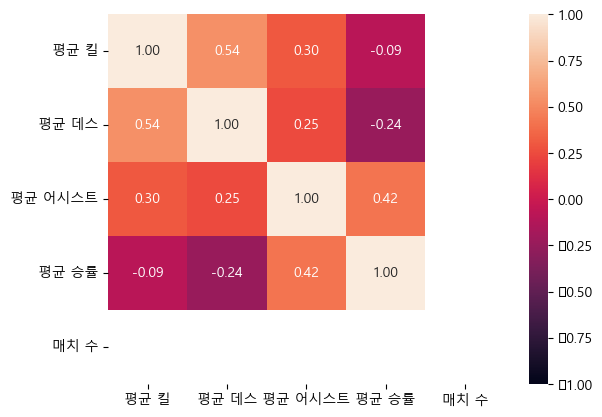

In [201]:
sns.heatmap(data=res[res['매치 수'] == 1].astype('float64').corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

##### Result of the most played champ

In [202]:
test = matches[matches['챔피언'] == classic_most_champion].loc[:, '킬':]
test

,킬,데스,어시스트,결과
6,8,2,9,승리
14,1,3,0,패배
21,15,2,6,승리
40,7,6,1,패배
58,7,10,7,패배
61,4,3,7,승리
63,4,3,1,패배
70,7,10,15,승리
76,9,1,5,승리
77,12,3,5,승리


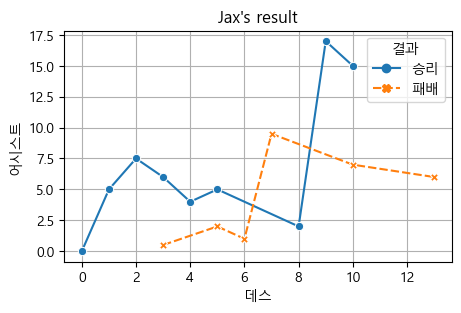

In [203]:
plt.figure(figsize=(5,3))
plt.title(classic_most_champion+'\'s result')
plt.grid()
sns.lineplot(data=test, x='데스', y='어시스트', hue='결과', style='결과', markers= ["o","X"], ci=None)
plt.show()

C:\Users\k0105\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\k0105\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


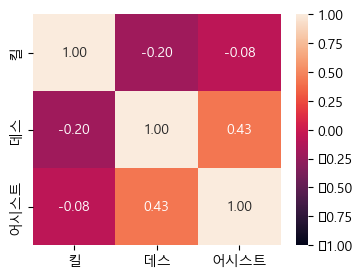

In [204]:
plt.figure(figsize=(4,3))
sns.heatmap(data=test.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

## Champion info scraping

* 스크래핑할 사이트: OP.GG
> https://www.op.gg/
    * 데이터는 알파벳 기준 정렬되어 수집
    * 한글로 가져오는 방법은 따로 다루지 않음, 원할 경우 구글 참조 바람

* 포지션 태그에 해당하는 챔피언이름 불러오기
    * 탑 : top
    * 미드 : mid
    * 원딜(바텀) : adc
    * 서폿 : support
    * 정글 : jungle

In [ ]:
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
s = Service(f'./{chrome_ver}/chromedriver.exe')

try:
    driver = webdriver.Chrome(service=s)   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(service=s)

driver.implicitly_wait(10)

In [ ]:
position = "top"
url = "https://www.op.gg/champions?region=global&tier=platinum_plus&position="+position
html = urlopen(url)
bsObject = BeautifulSoup(html, "html.parser") 
championList = [a["href"].split("/")[2] for a in bsObject.select(".e1oulx2j7 > tbody > tr > .e1oulx2j6 > a")]

* 가져올 챔피언의 수를 지정

In [ ]:
champ = 7

In [ ]:
championList = championList[:champ]

win_rates = []
for num, champion in enumerate(championList):
    champion_win_rates = {}
    progress_desc = str(num+1)+". "+champion+"("+str(num+1)+"/"+str(len(championList))+")"
    for target_champion in tqdm(championList, desc=progress_desc):
        if champion == target_champion: champion_win_rates[target_champion] = None
        else:
            url = "https://www.op.gg/champions/"+champion+"/"+position+"/counters?region=global&tier=platinum_plus&target_champion="+target_champion
            driver.get(url)
            bsObject = BeautifulSoup(driver.page_source, "html.parser") 
            win_rate = bsObject.select("#content-header > div:nth-child(1) > div:nth-child(3) > div > div.ew1oorz8 > div:nth-child(3) > div.ew1oorz5")[].get_text().replace("%","").strip()
            champion_win_rates[target_champion] = float(win_rate) if win_rate != '-' else np.nan
            time.sleep(3)
    win_rates.append(champion_win_rates);
win_rates = pd.DataFrame(win_rates)
win_rates.index = championList
win_rates

* 첫 문자 대문자로 변경
    * 단순 편의를 위함

In [ ]:
label = [i[0].upper()+i[1:] for i in win_rates.columns]

In [ ]:
win_rates.index = win_rates.columns = label

In [ ]:
win_rates

### Data analysis

* 결측치 대체
    * 데이터가 쌓이지 않았거나 미러전에 대해선 결측치 발생
    * 편의를 위해 대체

In [ ]:
win_rates = win_rates.fillna(0)

#### Counter matchup comparison

* 챔피언 간의 승률 확인

In [ ]:
chart = sns.heatmap(win_rates, annot=True, fmt=".2f", vmin=0.0, vmax=100.0)

chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0)

plt.show()

In [ ]:
driver.quit()

#### Check the trend

* 2년 전 인터뷰이지만 OP.GG 데이터 분석가 피셜, 승률 변화를 확인하면 어떤 챔피언이 좋은지 캐치할 수 있다고 함

In [ ]:
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
s = Service(f'./{chrome_ver}/chromedriver.exe')

try:
    driver = webdriver.Chrome(service=s)   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(service=s)

driver.implicitly_wait(10)

In [ ]:
position = "top"
url = "https://www.op.gg/champions?region=global&tier=platinum_plus&position="+position
html = urlopen(url)
bsObject = BeautifulSoup(html, "html.parser") 
championList = [a["href"].split("/")[2] for a in bsObject.select(".e1oulx2j7 > tbody > tr > .e1oulx2j6 > a")]

* 가져올 챔피언의 수를 지정

In [ ]:
champ = 7

* 패치 날짜를 가져옴
    * 날짜는 한 번만 가져오면 되기 때문에 따로 분리

In [ ]:
for _ in tqdm(range(1)):
    champion = championList[0]
    url = "https://www.op.gg/champions/"+champion+"/"+position+"/trends?region=global&tier=platinum_plus"
    driver.get(url)
    time.sleep(3)
    bsObject = BeautifulSoup(driver.page_source, "html.parser")
    patch_date = bsObject.select("#content-container > section:nth-child(1) > div:nth-child(3) > \
                                                div:nth-child(1) > svg > g:nth-child(2) > g > g > text > tspan")
    patch_date = [date.get_text() for date in patch_date]
patch_date

* 승률 트렌드 데이터 스크래핑

In [ ]:
championList = championList[:champ]
trends = []

for num, champion in enumerate(championList):
    trend = []
    progress_desc = str(num+1)+". "+champion+"("+str(num+1)+"/"+str(len(championList))+")"
    for _ in tqdm(range(1), desc=progress_desc):
        url = "https://www.op.gg/champions/"+champion+"/"+position+"/trends?region=global&tier=platinum_plus"
        driver.get(url)
        time.sleep(3)
        bsObject = BeautifulSoup(driver.page_source, "html.parser")
        trend = bsObject.select("#content-container > section:nth-child(1) > div:nth-child(3) > \
                                        div:nth-child(1) > svg > g:nth-child(4) > g:nth-child(3) > text > tspan")
    trend = [i.get_text()[:-1] for i in trend]
    trends.append(trend)  
trends = pd.DataFrame(trends, index=championList, columns=patch_date)
trends

* 왜인지 가끔 데이터들이 안 가져올 때가 있는데 비효율적이지만 while문으로 받을 때까지 반복할 수 있도록 아래 코드를 사용해 주세요.
    * 일단 위에 코드는 수정해 본다고 수정한 코드이긴 합니다.
    * 확인된 것 중 하나는 스크래핑하는 크롬창을 최소화하면 오래 걸리거나 안 되는 부분이 있는 듯합니다.

```
championList = championList[:champ]
trends = []

for num, champion in enumerate(championList):
    trend = []
    progress_desc = str(num+1)+". "+champion+"("+str(num+1)+"/"+str(len(championList))+")"
    for _ in tqdm(range(1), desc=progress_desc):
        while not trend:
            url = "https://www.op.gg/champions/"+champion+"/"+position+"/trends?region=global&tier=platinum_plus"
            driver.get(url)
            time.sleep(3)
            bsObject = BeautifulSoup(driver.page_source, "html.parser")
            trend = bsObject.select("#content-container > section:nth-child(1) > div:nth-child(3) > \
                                        div:nth-child(1) > svg > g:nth-child(4) > g:nth-child(3) > text > tspan")
        print(trend)
        trend = [i.get_text()[:-1] for i in trend]
    trends.append(trend)  
trends = pd.DataFrame(trends, index=championList, columns=patch_date)
trends
```

* 첫 문자 대문자로 변경

In [ ]:
label = [i[0].upper()+i[1:] for i in trends.index]
trends.index = label

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Trend')
plt.grid()
plt.xlabel('Patch date')
plt.ylabel('Ranking')
makers_dash = ['x-.', '*--', '+-.', 's:', 'o-', 'd--', 'p--',]

for idx, champ in enumerate(trends.index):
    y = np.array(trends.loc[champ]).astype(int)
    plt.yticks(-y, y)
    plt.plot(trends.columns, -y.astype(int), makers_dash[idx], label=trends.loc[champ].name)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
driver.quit()